This notebook looks at the fits for the run where we fixed $\lambda_{turn}=50$ $\mu$m. All of the sources fit in this way only had 1 undetected point, usually the SPIRE PLW band.

In [1]:
#Import modules and set plotting to be inside the notebook
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from glob import glob
import pandas as pd
%matplotlib inline
sns.set()

In [2]:
#Make sure the path to the modeling modules is in the PythonPath
import sys
sys.path.append('/ricci9nb/tshimizu/Github/bat-agn-sed-fitting/')

In [3]:
# Get all of the pickle files in the directory
pickle_files = glob('./pickles/*.pickle')
pickle_files

['./pickles/NGC3516_casey_bayes_wturn_fixed50.pickle',
 './pickles/MCG-07-03-007_casey_bayes_wturn_fixed50.pickle',
 './pickles/2MASXJ20005575-1810274_casey_bayes_wturn_fixed50.pickle',
 './pickles/CGCG420-015_casey_bayes_wturn_fixed50.pickle',
 './pickles/MCG-03-04-072_casey_bayes_wturn_fixed50.pickle',
 './pickles/Mrk885_casey_bayes_wturn_fixed50.pickle',
 './pickles/CGCG122-055_casey_bayes_wturn_fixed50.pickle',
 './pickles/2MASXJ12335145-2103448_casey_bayes_wturn_fixed50.pickle',
 './pickles/Mrk279_casey_bayes_wturn_fixed50.pickle',
 './pickles/CGCG493-002_casey_bayes_wturn_fixed50.pickle',
 './pickles/KAZ320_casey_bayes_wturn_fixed50.pickle',
 './pickles/Mrk653_casey_bayes_wturn_fixed50.pickle',
 './pickles/IC4329A_casey_bayes_wturn_fixed50.pickle',
 './pickles/NGC235A_casey_bayes_wturn_fixed50.pickle',
 './pickles/ESO506-G027_casey_bayes_wturn_fixed50.pickle',
 './pickles/MCG-01-40-001_casey_bayes_wturn_fixed50.pickle',
 './pickles/ESO383-18_casey_bayes_wturn_fixed50.pickle',
 '.

In [4]:
# Loop over all of the files and pull out the best-fit parameters for each source
fit_data = pd.DataFrame(columns=['logMdust', 'Tdust', 'beta', 'logNpl', 'alpha', 'wturn'])
for f in pickle_files:
    name = f.split('/')[-1].split('_')[0]
    src_file = open(f, 'rb')
    data = pickle.load(src_file)
    fit_data.loc[name] = data['best_fit_model'].parameters

In [9]:
# We can take a look at the DataFrame to make sure everything looks ok.
print(fit_data)

                        logMdust      Tdust      beta    logNpl     alpha  \
NGC3516                 5.825036  26.668214  2.284783  0.476444  1.530498   
MCG-07-03-007           6.825613  22.447723  2.024422 -0.198075  1.754006   
2MASXJ20005575-1810274  6.903182  34.030501  1.024689  0.213124  1.188132   
CGCG420-015             6.912467  22.883231  2.120069  0.226812  1.375570   
MCG-03-04-072           7.133984  27.273084  0.518550 -0.567288  1.184237   
Mrk885                  6.962320  24.241161  1.749686 -0.742397  1.474215   
CGCG122-055             6.550544  22.052761  2.392441  0.153998  2.085143   
2MASXJ12335145-2103448  6.076491  25.402247  2.257592 -0.227816  1.776830   
Mrk279                  6.903825  25.941323  1.874288  0.194830  1.650675   
CGCG493-002             6.423532  26.767190  1.777184 -0.113069  1.367395   
KAZ320                  6.403822  27.052850  2.126264 -0.258174  1.417260   
Mrk653                  7.449447  19.197303  2.000015 -0.496201  1.443262   

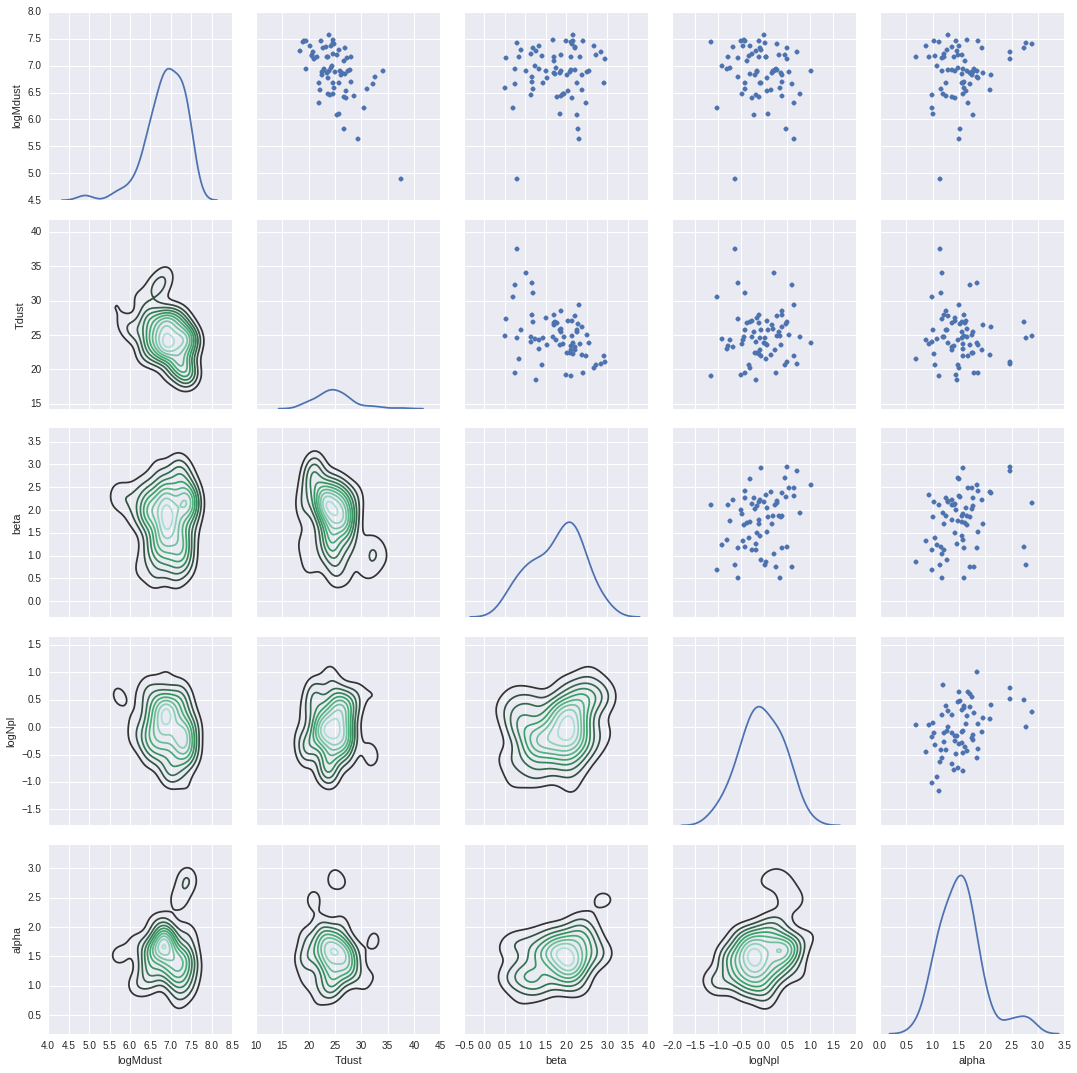

In [8]:
# Let's plot the pairwise relationship between all of the best fit parameters to see if there are any correlations
# between them.
fig = sns.PairGrid(fit_data, vars=['logMdust', 'Tdust', 'beta', 'logNpl', 'alpha'])
fig.map_upper(plt.scatter)
fig.map_lower(sns.kdeplot)
fig.map_diag(sns.kdeplot, legend=False)

The only strong correlation seems to be between Tdust and Mdust in the sense where higher Tdust corresponds to lower Mdust. This makes sense since you don't need as much dust to be able to output the same amount of energy when its hotter. The other noticeable thing is that the distributions seems much more broader than for the sources which had no undetected points. There is also an interesting source which has an extremely low amount of dust with logMdust $< 5.0$. Its for NGC5273 which is a known elliptical galaxy, so it makes sense as well. A look at the SED also shows that the fit is good so it seems like a real result.

In [10]:
ngc5273_fn = './pickles/NGC5273_casey_bayes_wturn_fixed50.pickle'
f = open(ngc5273_fn, 'rb')
ngc5273_data = pickle.load(f)

In [11]:
ngc5273_data.keys()

['name', 'flux_err', 'flux', 'best_fit_model', 'filters', 'waves']

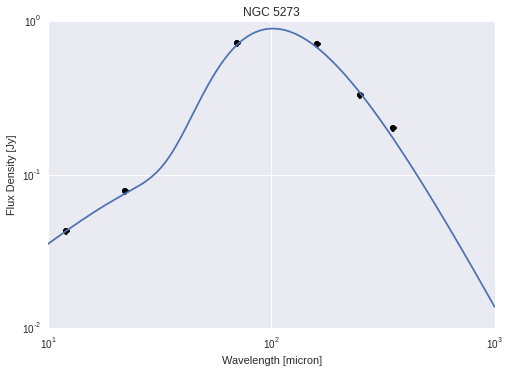

In [19]:
det = np.isfinite(ngc5273_data['flux'])
plt.loglog(ngc5273_data['waves'][det], ngc5273_data['flux'][det], 'ko')
w = np.arange(1, 1000)
plt.loglog(w, ngc5273_data['best_fit_model'](w))
plt.xlabel('Wavelength [micron]')
plt.ylabel('Flux Density [Jy]')
plt.ylim(0.01, 1)
plt.xlim(10, 1000)
plt.title('NGC 5273')

In [20]:
fit_data.describe(percentiles=[0.025, 0.16, 0.50, 0.84, 0.975])

,logMdust,Tdust,beta,logNpl,alpha,wturn
count,68.000000,68.000000,68.000000,68.000000,68.000000,68
mean,6.869644,24.922874,1.775481,-0.049616,1.546405,50
std,0.481606,3.620166,0.619541,0.463412,0.438199,0
min,4.903499,18.424333,0.497944,-1.160408,0.691356,50
2.5%,5.765093,19.124878,0.633997,-0.946152,0.909944,50
16%,6.465064,21.779750,1.131983,-0.482595,1.159796,50
50%,6.903503,24.637900,1.867938,-0.082607,1.520260,50
84%,7.336369,27.551152,2.344612,0.415203,1.851143,50
97.5%,7.466250,33.012093,2.880077,0.733053,2.747679,50
max,7.558789,37.578480,2.943204,1.013576,2.885186,50


Based on the statistics from this fitting run, it looks like not much has changed from the first run where all of the sources were detected at all wavelengths. The median $T_{dust}$ is 25 K, $\beta$ is 1.87, $\alpha$ is 1.5 compared to 25 K, 1.8, and 1.6 from before. The difference is definitely well within the uncertainties of those values. Also $M_{dust}$ is still right around $10^7$ solar masses. This only confirms that for the next run we can be confident in fixing $\beta=1.8$.

I want to make a list of sources that I think are probably going to warrant a re-fit using different fixed parameters. We most likely need to adjust the turnover wavelength or possibly let it be free and fix dust temperature.
* ESO103-035
* Mrk1210
* NGC 788